In [1]:
#Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\victo\Desktop\kaggle\bank_churn\BankChurners.csv')

In [ ]:
df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                  'CLIENTNUM'],inplace=True)

In [5]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## EDA

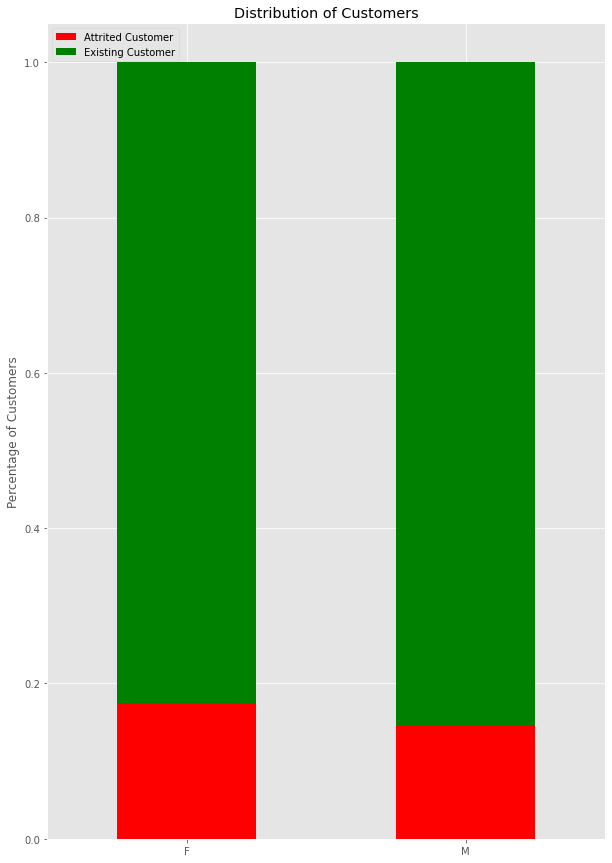

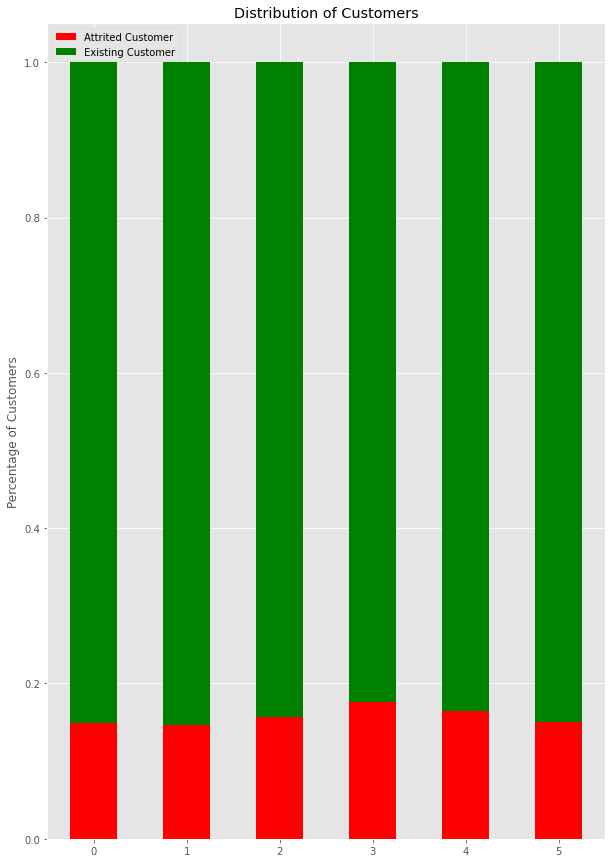

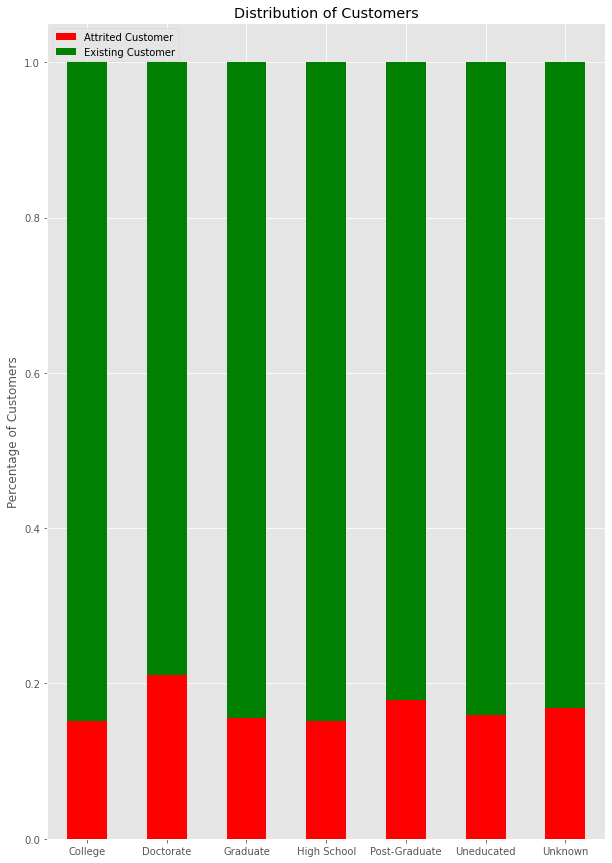

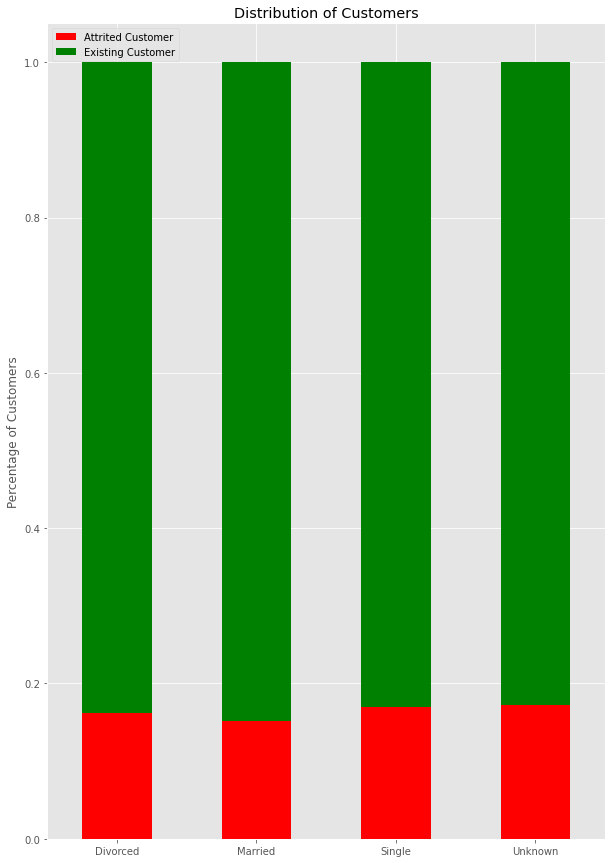

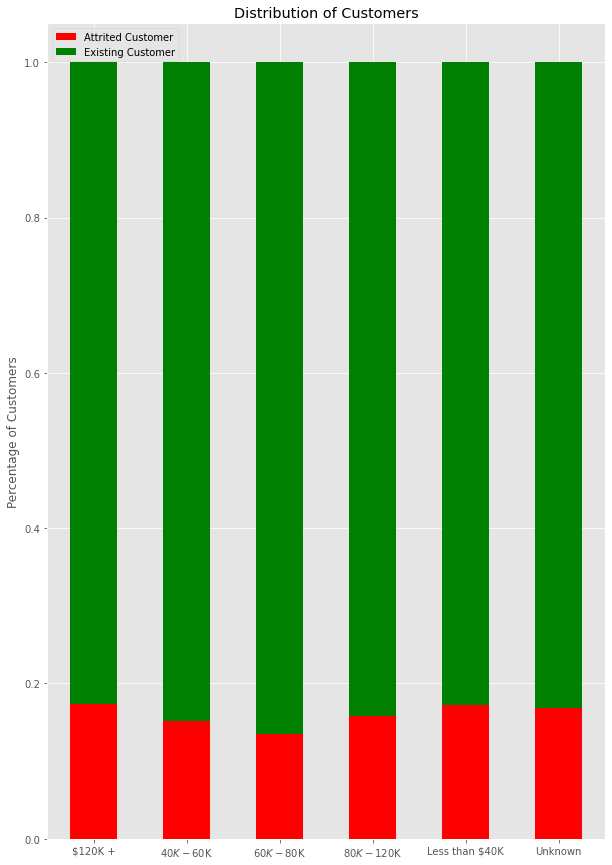

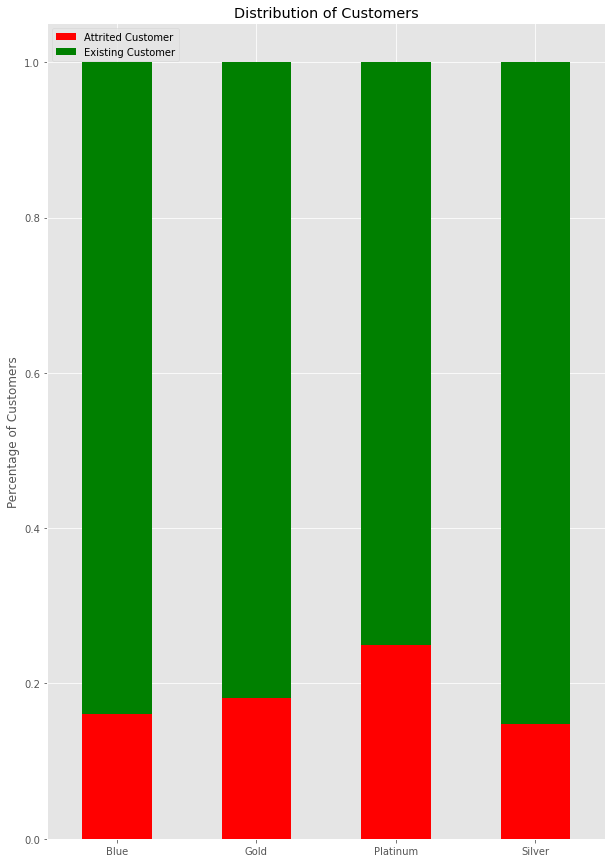

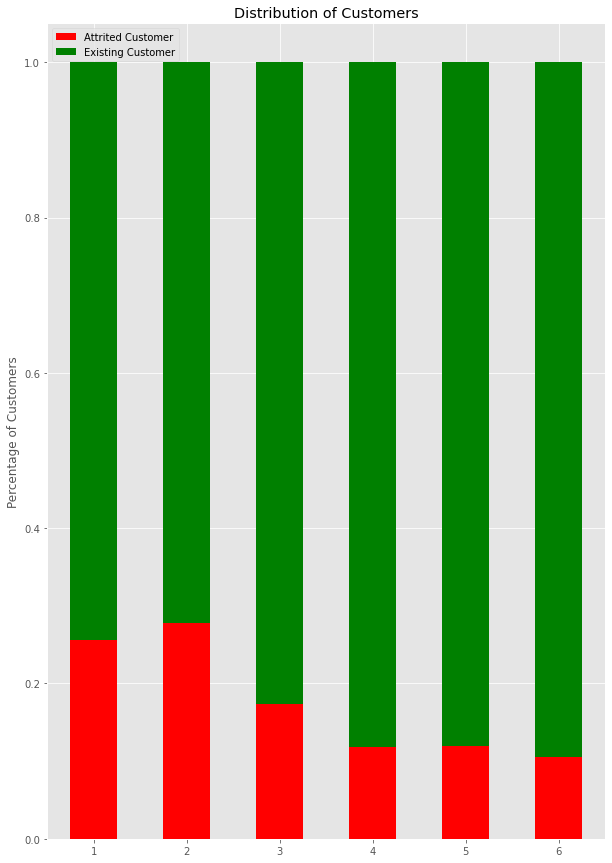

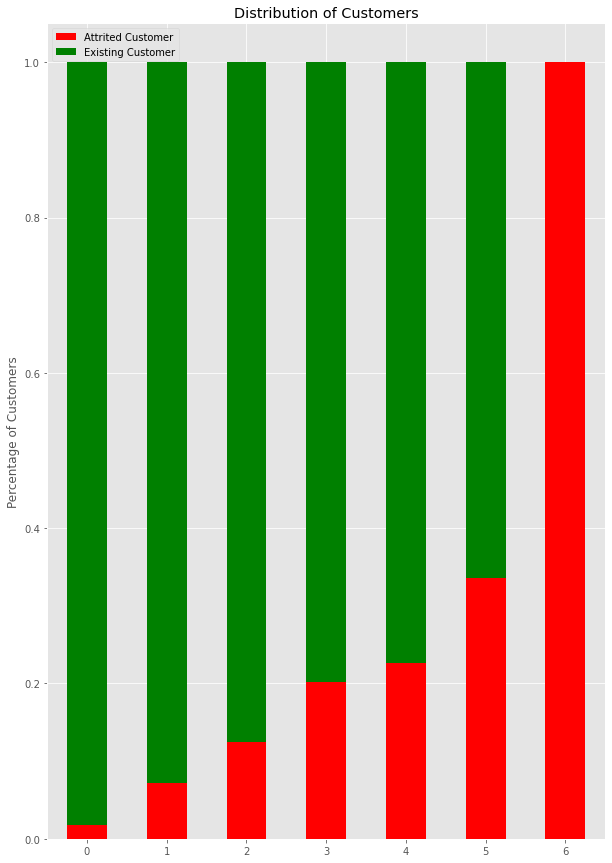

In [6]:
def make_stack_graph(x):
    stacked_columns =[ 'Gender', 'Dependent_count','Education_Level', 'Marital_Status', 'Income_Category', 
                      'Card_Category',"Total_Relationship_Count",'Contacts_Count_12_mon']
    xtab= pd.crosstab(df[stacked_columns[i]], df['Attrition_Flag'],normalize='index')
    plt.style.use('ggplot')
    xtab.plot(kind='bar',stacked=True,layout='tight',figsize=(10,15),color=['red','green'])
    plt.ylabel("Percentage of Customers")
    plt.xticks(rotation='horizontal')
    plt.title('Distribution of Customers')
    plt.xlabel('')
    plt.legend(loc="upper left")
stacked_columns =[ 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',"Total_Relationship_Count",
                  'Contacts_Count_12_mon']
for i in range(len(stacked_columns)):
    make_stack_graph(stacked_columns[i])

E:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


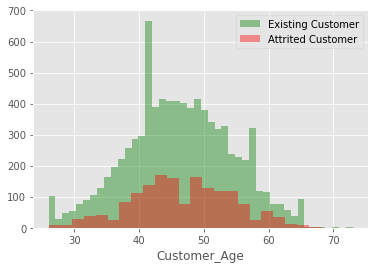

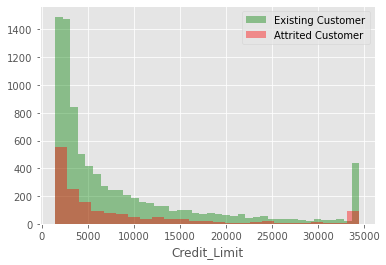

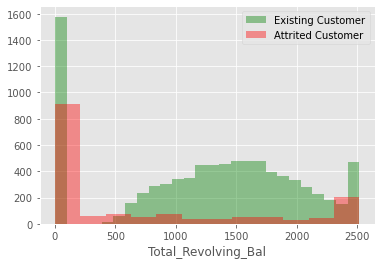

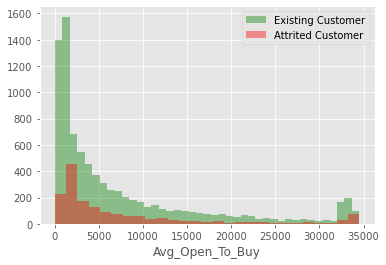

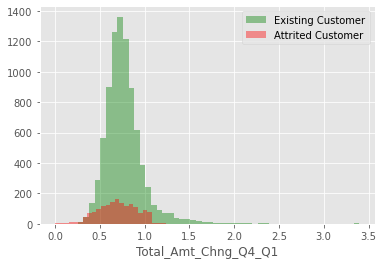

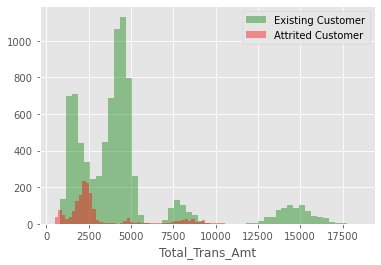

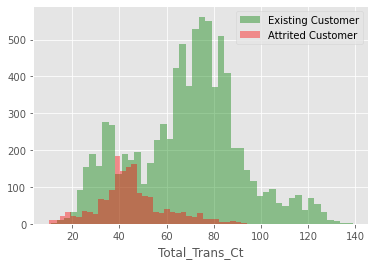

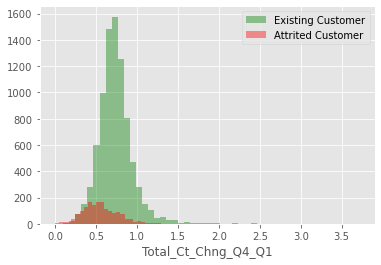

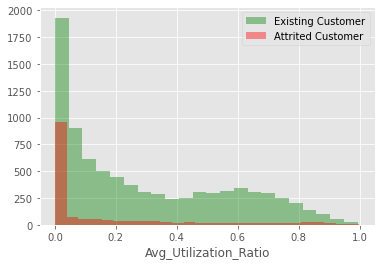

In [7]:
def make_dist_plots():
    cols = ['Customer_Age','Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
    for i in range(len(cols)):
        df_exist = df.loc[df['Attrition_Flag']=='Existing Customer']
        df_att = df.loc[df['Attrition_Flag']=='Attrited Customer']
        sns.distplot(df_exist[cols[i]],label = 'Existing Customer',color = 'green', kde =False)
        sns.distplot(df_att[cols[i]], label = 'Attrited Customer',color = 'red',kde=False)
        plt.legend()
        plt.show()
make_dist_plots()

## Feature Engineering

In [12]:
churn_map = {"Existing Customer": 0, "Attrited Customer":1}
df.replace({"Attrition_Flag": churn_map},inplace=True)
df.rename(columns = {'Attrition_Flag': 'y'},inplace=True)

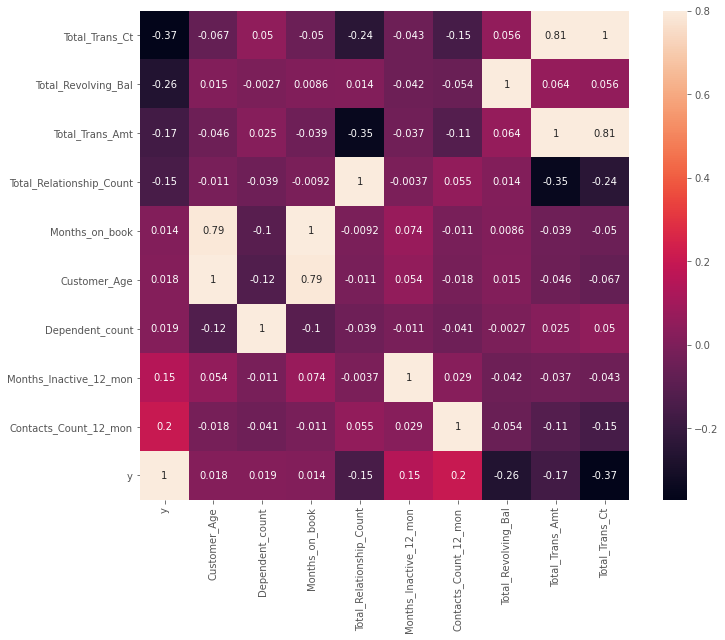

In [14]:

corrmatrix = df.select_dtypes(include='int64').corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmatrix.sort_values(by='y'), vmax=.8, square=True,annot=True);

In [6]:
cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df= pd.get_dummies(df, columns = cols)
df.drop(columns = ['Income_Category_Unknown','Marital_Status_Unknown','Education_Level_Unknown','Gender_F'],inplace=True)

In [7]:
churn_map = {"Existing Customer": 0, "Attrited Customer":1}
df.replace({"Attrition_Flag": churn_map},inplace=True)
df.rename(columns = {'Attrition_Flag': 'y'},inplace=True)

In [8]:
y = df['y']
X = df.drop(columns='y')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
